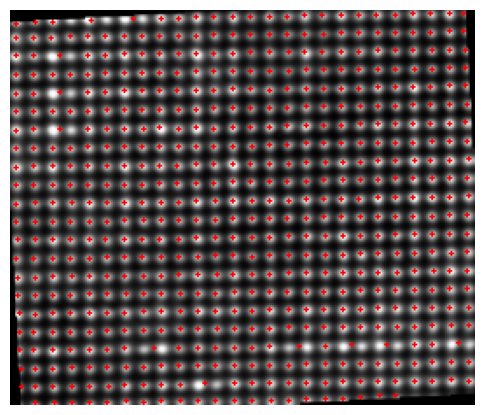

[(35, 224), (25, 224), (14, 224), (76, 224), (55, 224), (45, 224), (138, 223), (128, 223), (117, 223), (107, 223), (97, 223), (86, 223), (66, 223), (200, 221), (190, 222), (180, 222), (169, 222), (159, 223), (149, 223), (220, 220), (211, 220), (35, 215), (14, 215), (6, 215), (76, 214), (56, 215), (45, 215), (24, 215), (97, 214), (86, 214), (65, 214), (200, 212), (180, 213), (169, 213), (159, 213), (138, 213), (128, 213), (111, 213), (262, 212), (241, 212), (220, 212), (210, 212), (190, 212), (148, 213), (252, 211), (231, 212), (55, 204), (35, 204), (24, 205), (14, 205), (6, 205), (96, 203), (76, 204), (66, 204), (45, 204), (159, 203), (138, 203), (128, 203), (117, 203), (107, 203), (86, 203), (221, 202), (200, 202), (190, 202), (180, 202), (169, 202), (148, 203), (262, 201), (252, 201), (241, 201), (231, 202), (210, 202), (34, 194), (13, 194), (55, 194), (45, 194), (24, 194), (5, 194), (138, 193), (117, 193), (96, 193), (65, 193), (180, 192), (148, 192), (128, 193), (107, 193), (82, 19

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/2234-3.tif", cv2.IMREAD_GRAYSCALE)

_, binary = cv2.threshold(image, 94, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

centroids = []

for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        centroids.append((cx, cy))
        cv2.circle(output, (cx, cy), 1, (0, 0, 255), -1)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print(centroids)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


scale = 5/287

# Load the grayscale image
image = cv2.imread("/content/2234-3.tif", cv2.IMREAD_GRAYSCALE)

# Threshold to get binary image
_, binary = cv2.threshold(image, 94, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert to BGR for visualization
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Store centroids
centroids = []

for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        centroids.append((cx, cy))

# Sort centroids by y-coordinate first
centroids.sort(key=lambda c: c[1])

# Group centroids into rows
row_tolerance = 4 # Adjust this value based on how far atoms in a row can vary and check if image is more tilted then rotate and make horizontal, check similarity in output by varying tolerance.
rows = []
current_row = [centroids[0]]

for i in range(1, len(centroids)):
    if abs(centroids[i][1] - current_row[-1][1]) < row_tolerance:
        current_row.append(centroids[i])
    else:
        rows.append(sorted(current_row))  # Keep order as is
        current_row = [centroids[i]]

# Add the last row
if current_row:
    rows.append(sorted(current_row))

# Ensure there are at least 5 rows
print(len(rows))

22


[(3, 111), (14, 110), (24, 110), (35, 110), (45, 110), (55, 110), (65, 110), (75, 110), (86, 110), (96, 110), (106, 109), (117, 109), (127, 109), (138, 109), (148, 109), (159, 109), (169, 108), (179, 108), (189, 108), (199, 108), (210, 107), (220, 107), (230, 107), (241, 107), (251, 107), (262, 106)]


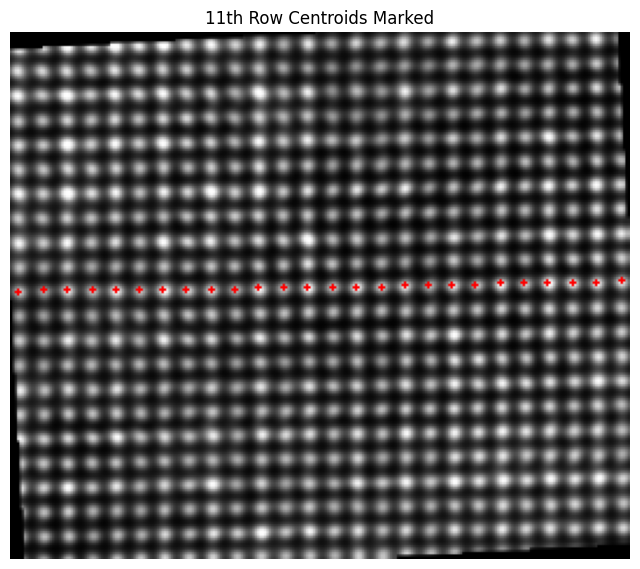

11th row centroids: [(3, 111), (14, 110), (24, 110), (35, 110), (45, 110), (55, 110), (65, 110), (75, 110), (86, 110), (96, 110), (106, 109), (117, 109), (127, 109), (138, 109), (148, 109), (159, 109), (169, 108), (179, 108), (189, 108), (199, 108), (210, 107), (220, 107), (230, 107), (241, 107), (251, 107), (262, 106)]


In [ ]:
n = 10
print(rows[n])
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # From Original image where we got all the centroids.
if len(rows) >= n:
    curr_row = rows[n]  # 5th row (0-based index)

    for cx, cy in curr_row:
        # Mark centroids with red circles
        cv2.circle(output, (cx, cy), 1, (0, 0, 255), -1)

    # Display the image with centroids
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"{n+1}th Row Centroids Marked")
    plt.show()

    # Print the 5th row centroids
    print(f"{n+1}th row centroids:", curr_row)
else:
    print(f"Less than {n+1} rows detected.")


In [ ]:
import numpy as np

horizontal_distances = []

for i in range(len(curr_row) - 1):
    x1, y1 = curr_row[i]
    x2, y2 = curr_row[i + 1]

    distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    horizontal_distances.append(distance)

if horizontal_distances:  # Ensure list is not empty before computing mean
    avg_distance_px = np.mean(horizontal_distances)
    avg_distance = avg_distance_px * scale
    print("Average horizontal distance between atoms:", avg_distance)
else:
    print("No horizontal distances computed. Check curr_row data.")

print("horizontal_distances:", horizontal_distances)


Average horizontal distance between atoms: 0.17992367475722393
horizontal_distances: [10.0, 11.0, 10.0, 10.0, 11.045361017187261, 10.0, 10.0, 10.0, 11.0, 10.0, 10.04987562112089, 11.0, 10.0, 11.0, 10.0, 11.045361017187261, 10.0, 10.0, 11.0, 10.0, 10.0, 10.04987562112089, 10.0, 11.0, 10.0]


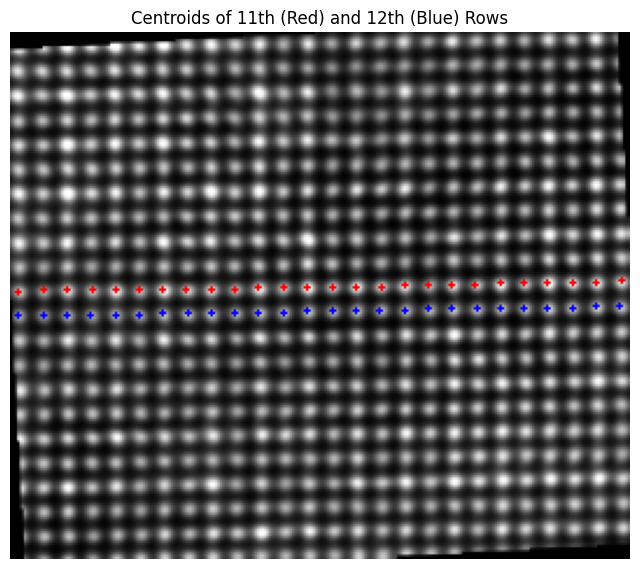

11th row centroids: [(3, 111), (14, 110), (24, 110), (35, 110), (45, 110), (55, 110), (65, 110), (75, 110), (86, 110), (96, 110), (106, 109), (117, 109), (127, 109), (138, 109), (148, 109), (159, 109), (169, 108), (179, 108), (189, 108), (199, 108), (210, 107), (220, 107), (230, 107), (241, 107), (251, 107), (262, 106)]
12th row centroids: [(3, 121), (14, 121), (24, 121), (34, 121), (45, 121), (55, 121), (65, 120), (76, 120), (86, 120), (96, 120), (106, 120), (117, 120), (127, 119), (138, 119), (148, 119), (158, 119), (169, 119), (179, 118), (189, 118), (200, 118), (210, 118), (220, 118), (230, 118), (241, 118), (251, 117), (261, 117)]


In [ ]:
n1 = 1 # First row index
n2 = 18 # Second row index
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if len(rows) > max(n1, n2):
    curr_row1 = rows[n1]
    curr_row2 = rows[n2]

    for cx, cy in curr_row1:
        cv2.circle(output, (cx, cy), 1, (0, 0, 255), -1)  # Red for n1

    for cx, cy in curr_row2:
        cv2.circle(output, (cx, cy), 1, (255, 0, 0), -1)  # Blue for n2

    # Display the image with centroids from both rows
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Centroids of {n1+1}th (Red) and {n2+1}th (Blue) Rows")
    plt.show()

    print(f"{n1+1}th row centroids:", curr_row1)
    print(f"{n2+1}th row centroids:", curr_row2)
else:
    print(f"Less than {max(n1, n2)+1} rows detected.")


In [ ]:
import numpy as np  # Ensure numpy is imported

r1 = rows[n1]
r2 = rows[n2]

vert = []

# Ensure both lists are the same length before iterating
for (x1, y1), (x2, y2) in zip(r1, r2):
    distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)  # Euclidean distance
    vert.append(distance)

# Compute the average vertical distance
avg_vert_px = np.mean(vert)
avg_vert = avg_vert_px * scale  # Convert using scale

print("Vertical distance between atoms:", vert)
print("Average vertical distance between atoms:", avg_vert)


Vertical distance between atoms: [10.0, 11.0, 11.0, 11.045361017187261, 11.0, 11.0, 10.0, 10.04987562112089, 10.0, 10.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.04987562112089, 11.0, 10.0, 10.0, 10.04987562112089, 11.0, 11.0, 11.0, 11.0, 10.0, 11.045361017187261]
Average vertical distance between atoms: 0.18308787784624578
